../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv: 1 failed experiments using turbo.gpu.release have been removed (the faulty experiments have been stored in failed_turbo.gpu.release-v1.2.8-mzn2024.csv).
| solver                                                        |   MiniZinc score |
|:--------------------------------------------------------------|-----------------:|
| com.google.ortools.sat_9.9_aion_1200s                         |         103.842  |
| org.choco.choco_4.10.18_aion_1200s                            |          46.8206 |
| turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0 |          38.284  |
| solver                                                        |   XCSP3 score |
|:--------------------------------------------------------------|--------------:|
| com.google.ortools.sat_9.9_aion_1200s                         |            74 |
| org.choco.choco_4.10.18_aion_1200s                            |            48 |
| turbo.gpu.release_1.2.8_helios_1200

/home/ptalbot/repositories/lattice-land/bench/benchmarks/analyzing/analysis.py:233: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


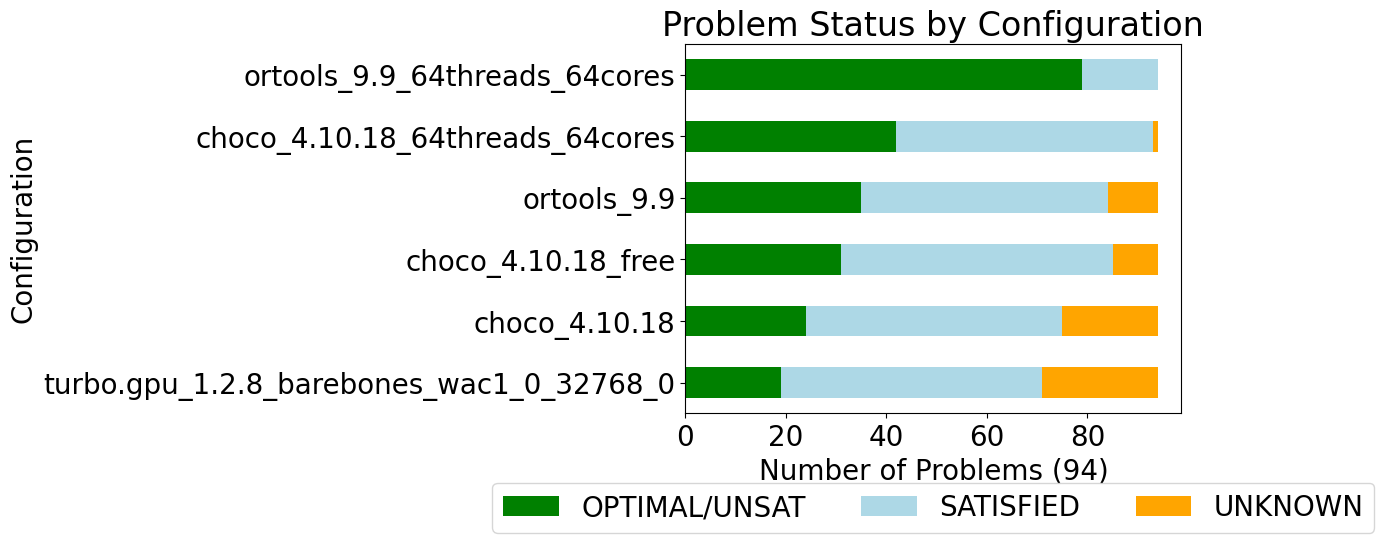

,uid,version,machine,short_uid,avg_nodes_per_second,median_nodes_per_second,avg_normalized_nodes_per_second,best_nodes_per_second,avg_deductions_per_node,median_deductions_per_node,avg_normalized_deductions_per_node,median_normalized_deductions_per_node,best_deductions_per_node,avg_deductions_per_second,median_deductions_per_second,avg_normalized_deductions_per_second,median_normalized_deductions_per_second,best_deductions_per_second,avg_fp_iterations_per_second,median_fp_iterations_per_second,avg_normalized_fp_iterations_per_second,best_fp_iterations_per_second,avg_fp_iterations,median_fp_iterations,avg_normalized_fp_iterations,best_fp_iterations,avg_propagator_mem_mb,median_propagator_mem_mb,avg_normalized_propagator_mem_mb,best_propagator_mem_mb,avg_store_mem_kb,avg_normalized_store_mem_kb,best_store_mem_kb,median_store_mem_kb,problem_optimal,problem_sat,problem_unknown,problem_with_store_shared,problem_with_props_shared,idle_eps_workers
5,turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0,1.2.8,helios,turbo.gpu_1.2.8_barebones_wac1_0_32768_0,568703.858260,117691.397145,0.0,0,4.947301e+06,230900.858486,0.0,0.0,94,5.286247e+10,6.611054e+10,0.0,0.0,94,4.659616e+06,1.481590e+06,0.0,0,18.885697,10.948066,0.0,94,1.089213,0.261984,0.0,94,388.053787,0.0,94,120.092,19,52,23,17,12,26.0
2,org.choco.choco_4.10.18_aion_1200s,4.10.18,aion,choco_4.10.18,31683.997033,11050.689958,0.0,0,1.000000e+00,1.000000,0.0,0.0,94,3.168400e+04,1.105069e+04,0.0,0.0,94,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,94,0.000000,0.000000,0.0,94,0.000000,0.0,94,0.000,24,51,19,0,0,0.0
0,com.google.ortools.sat_9.9_aion_1200s,9.9,aion,ortools_9.9,11700.389806,4843.706238,0.0,0,1.000000e+00,1.000000,0.0,0.0,94,1.170039e+04,4.843706e+03,0.0,0.0,94,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,94,0.000000,0.000000,0.0,94,0.000000,0.0,94,0.000,35,49,10,0,0,0.0
4,org.choco.choco_4.10.18_aion_1200s_free,4.10.18,aion,choco_4.10.18_free,3749.685231,1419.822110,0.0,0,1.000000e+00,1.000000,0.0,0.0,94,3.749685e+03,1.419822e+03,0.0,0.0,94,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,94,0.000000,0.000000,0.0,94,0.000000,0.0,94,0.000,31,54,9,0,0,0.0
3,org.choco.choco_4.10.18_aion_1200s_64threads_64cores,4.10.18,aion,choco_4.10.18_64threads_64cores,3678.212380,1014.716866,0.0,0,1.000000e+00,1.000000,0.0,0.0,94,3.678212e+03,1.014717e+03,0.0,0.0,94,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,94,0.000000,0.000000,0.0,94,0.000000,0.0,94,0.000,42,51,1,0,0,0.0
1,com.google.ortools.sat_9.9_aion_1200s_64threads_64cores,9.9,aion,ortools_9.9_64threads_64cores,211.454946,9.118800,0.0,0,1.000000e+00,1.000000,0.0,0.0,94,2.114549e+02,9.118800e+00,0.0,0.0,94,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,94,0.000000,0.000000,0.0,94,0.000000,0.0,94,0.000,79,15,0,0,0,0.0


| short_uid                                |   avg_nodes_per_second |   problem_optimal |   problem_sat |   problem_unknown |
|:-----------------------------------------|-----------------------:|------------------:|--------------:|------------------:|
| ortools_9.9_64threads_64cores            |                211.455 |                79 |            15 |                 0 |
| choco_4.10.18_64threads_64cores          |               3678.21  |                42 |            51 |                 1 |
| ortools_9.9                              |              11700.4   |                35 |            49 |                10 |
| choco_4.10.18_free                       |               3749.69  |                31 |            54 |                 9 |
| choco_4.10.18                            |              31684     |                24 |            51 |                19 |
| turbo.gpu_1.2.8_barebones_wac1_0_32768_0 |             568704     |                19 |            52 |             

/home/ptalbot/repositories/lattice-land/bench/benchmarks/analyzing/analysis.py:509: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


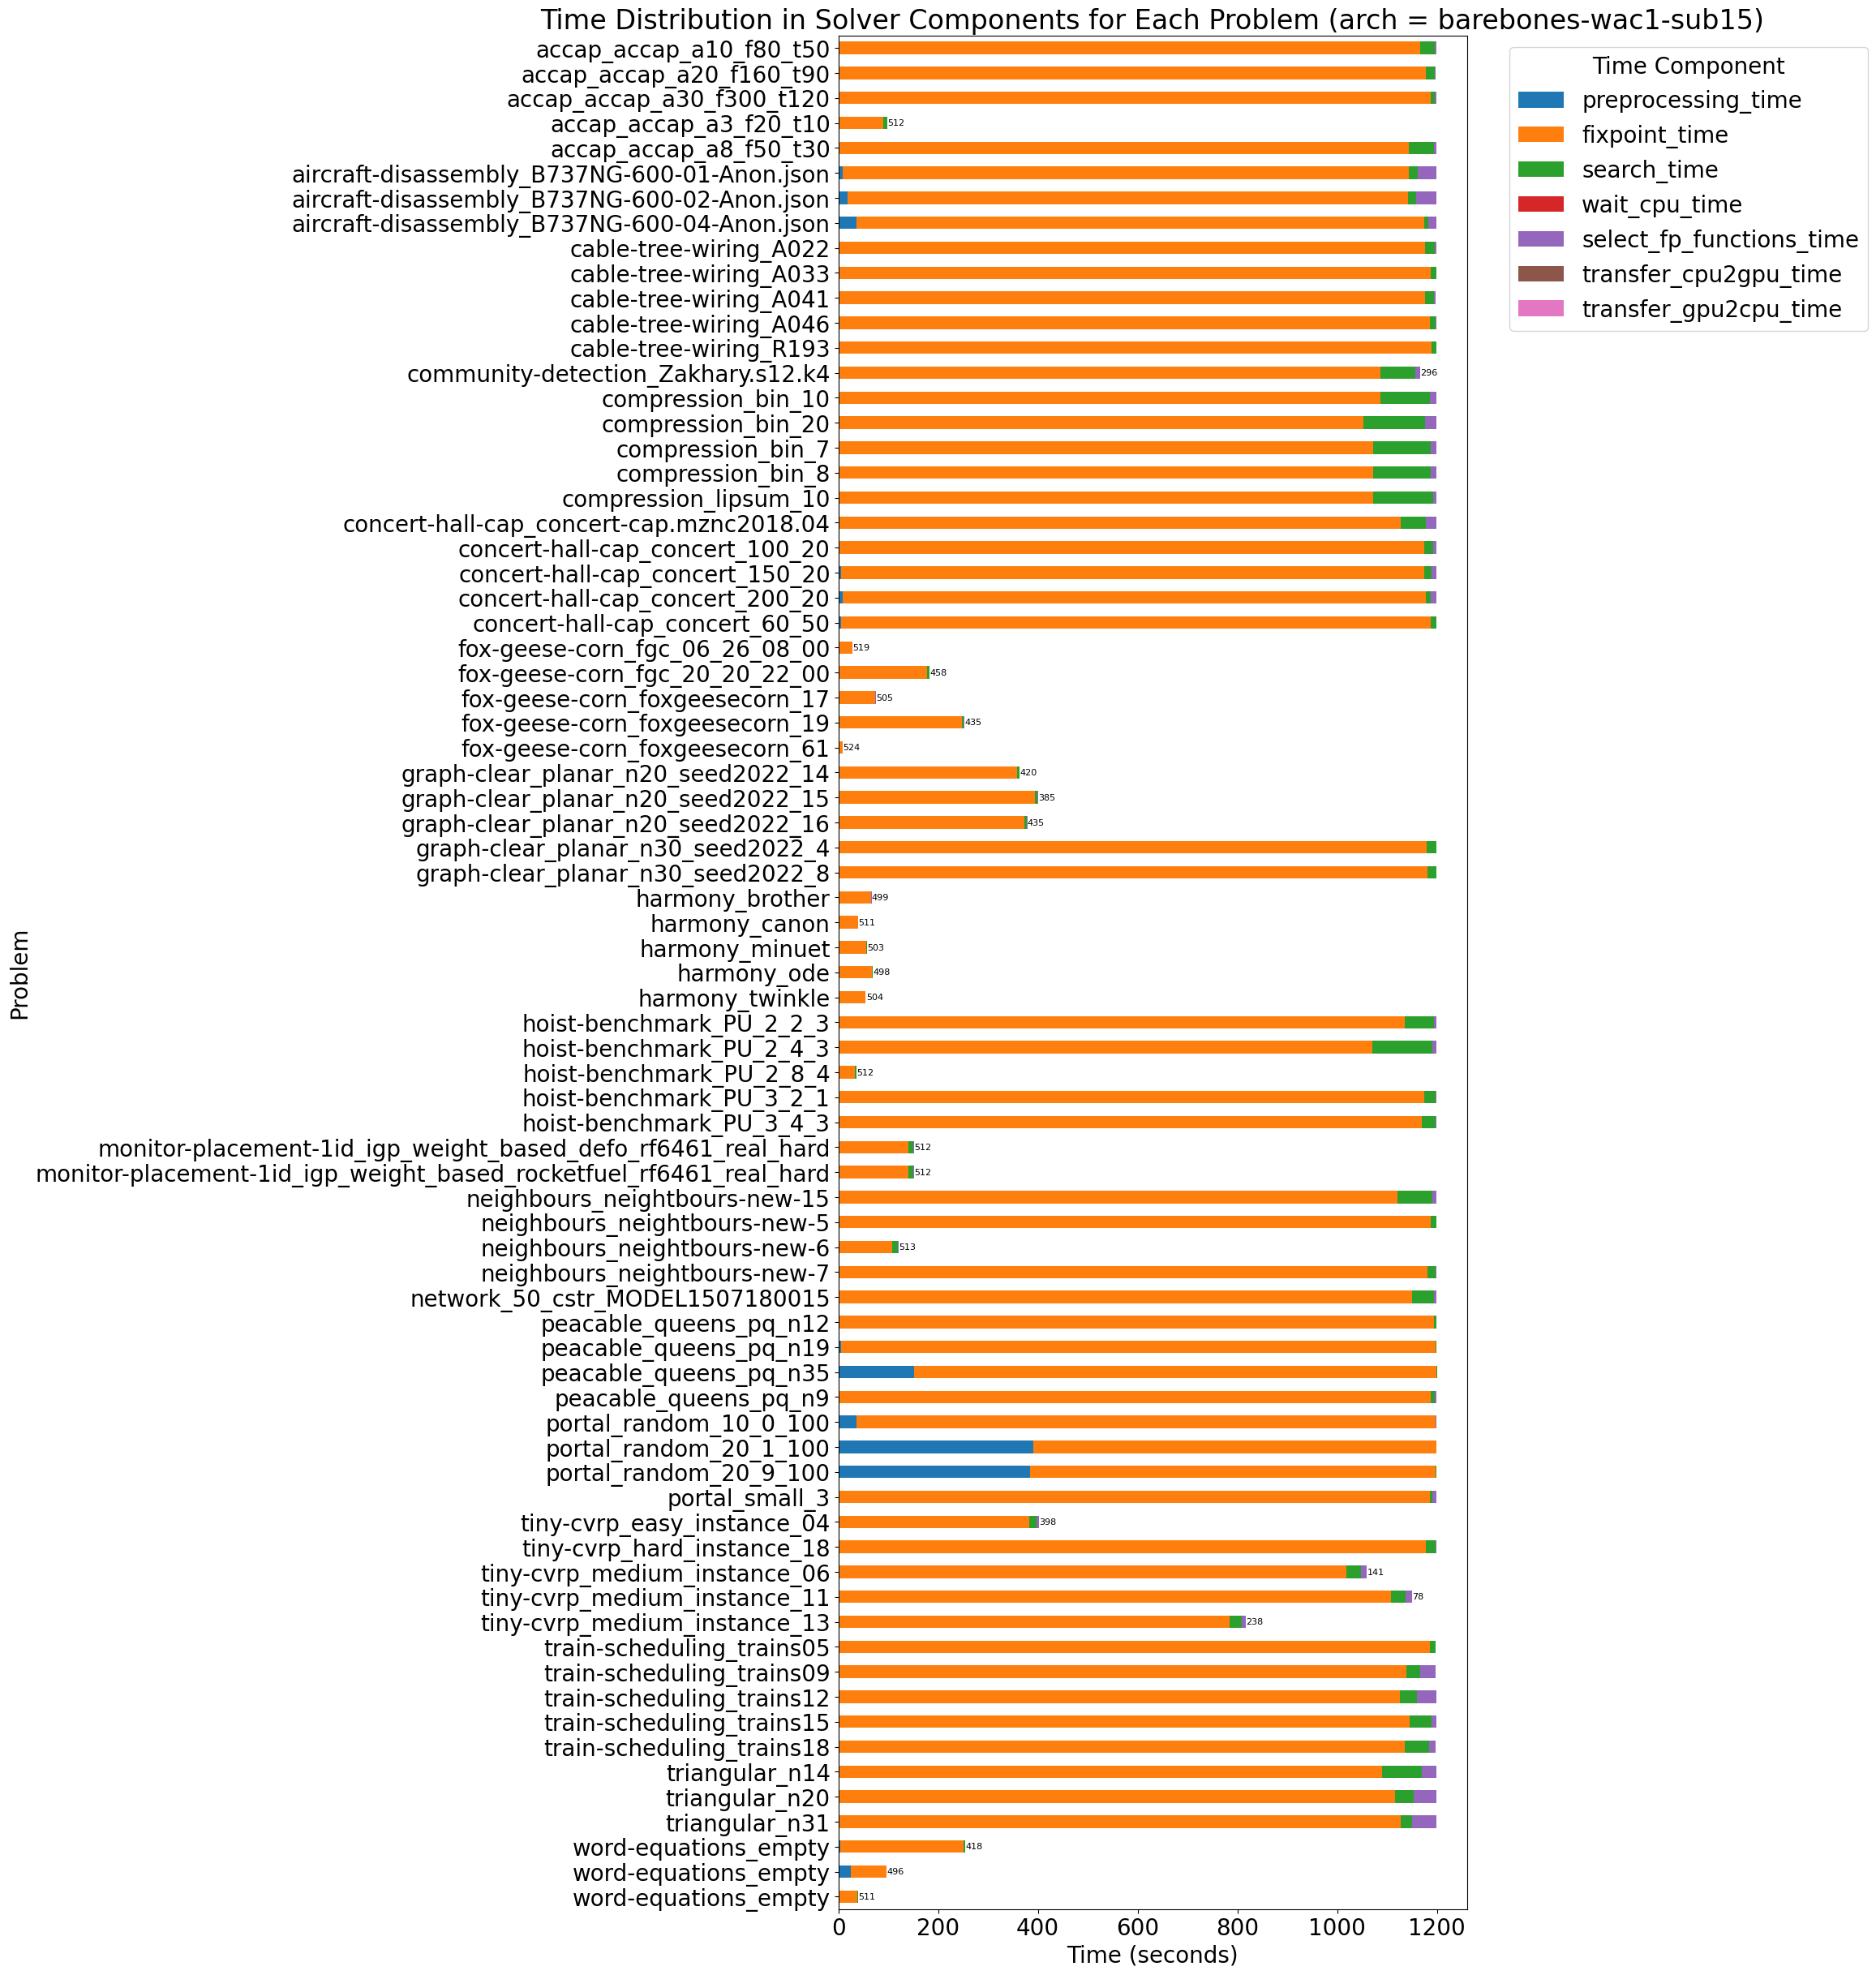

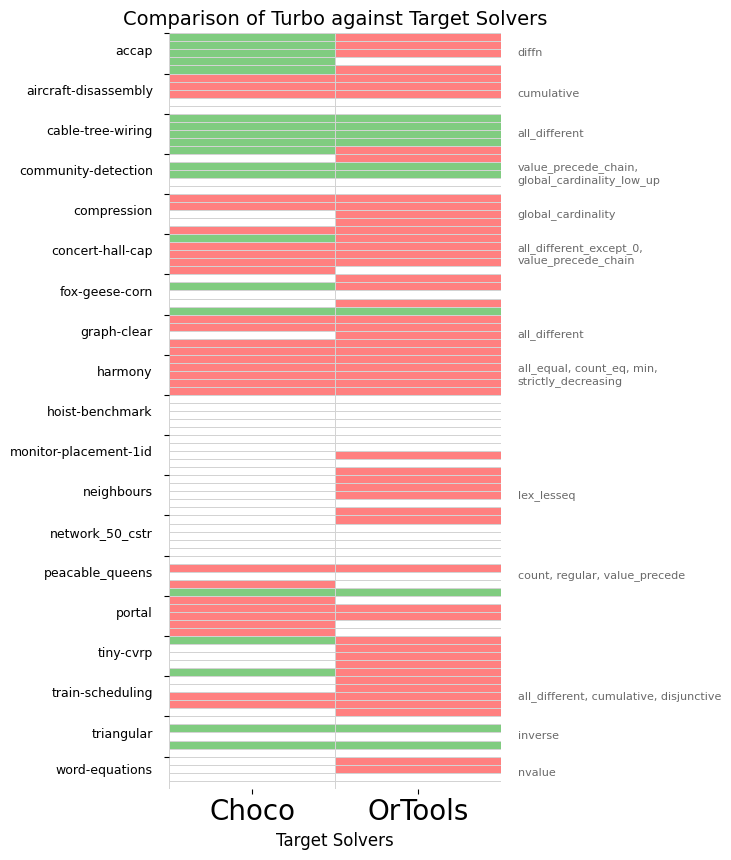

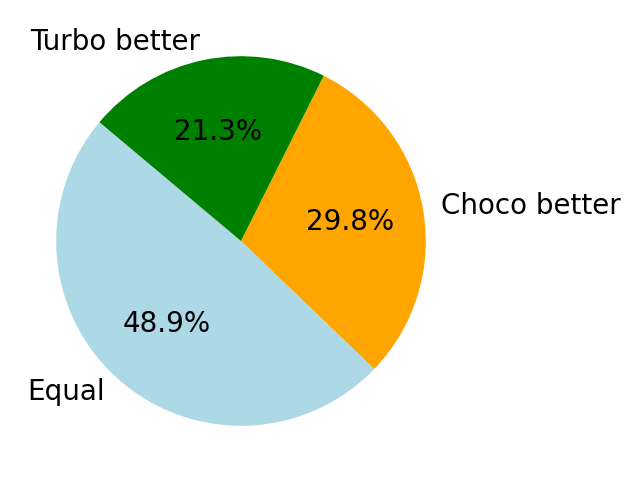

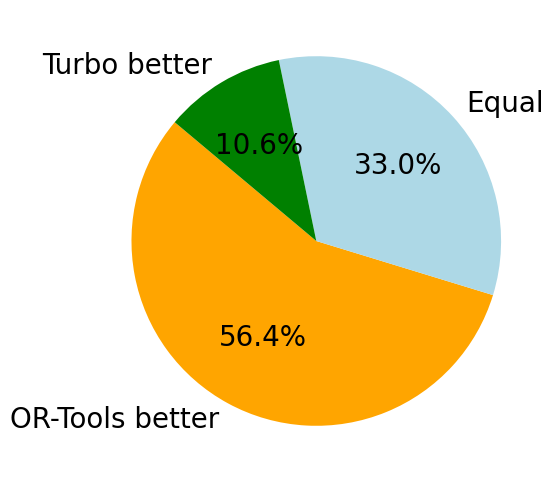

In [7]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  # "../campaign/precision5820/com.google.ortools.sat-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat.noglobal-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat-v9.9-par.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.1.7-A5000.csv",
  # "../campaign/precision5820/turbo.cpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.1.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv"
  # "../campaign/helios/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.5-mzn2022-short.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.6-mzn2022-short.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.7-mzn2022-short.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.8-mzn2022-short.csv"
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.6.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.7-mzn2024.csv",
  "../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv",
  "../campaign/aion/org.choco.choco-v4.10.18-mzn2024.csv",
  "../campaign/aion/com.google.ortools.sat-v9.9.csv"
  # "../campaign/iris/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision7750/turbo.cpu.release-v1.2.6-analysis.csv"
  # "../campaign/aion/turbo.cpu.release-v1.2.7-mzn2024-analysis.csv"
  # "../campaign/precision7750/turbo.gpu.release-v1.2.7.csv"
  # "../campaign/precision5820/turbo.cpu.release-v1.2.4.csv"
])

# df.to_csv("test.csv", index=False)

mzn_challenge = pd.read_csv("../benchmarking/mzn2024.csv")
# mzn_challenge = pd.read_csv("../benchmarking/short.csv")
mzn_challenge['model_data_file'] = mzn_challenge['model'] + ' - ' + mzn_challenge['data_file']
# print(mzn_challenge)
mzn_data = set(mzn_challenge['model_data_file'])
df = df[df['model_data_file'].isin(mzn_data)]

# df = df[df['memory_configuration'] != 'global']

df = analysis.intersect(df)

solvers_in_scoreboard = [
  # "com.google.ortools.sat_9.9_aion_1200s_64threads_64cores",
  # "org.choco.choco_4.10.18_aion_1200s_64threads_64cores",
  # "org.choco.choco_4.10.18_aion_1200s_free",
  "com.google.ortools.sat_9.9_aion_1200s",
  "org.choco.choco_4.10.18_aion_1200s",
  "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0"
]

print(analysis.scores_summary('MiniZinc', analysis.minizinc_challenge_score(df, solvers_in_scoreboard)).to_markdown(index=False))
print(analysis.scores_summary('MiniZinc', analysis.minizinc_challenge_score(df, solvers_in_scoreboard)).to_latex(index=False))
print(analysis.scores_summary('XCSP3', analysis.xcsp3_challenge_score(df, solvers_in_scoreboard)).to_markdown(index=False))

# df = df[df['timeout_ms'] == 1200000]

# print(df[df['preprocessing_time'] >= 1200])

print(df[((df['store_mem'] + df['propagator_mem']) / 1000 / 1000) > 5][['model_data_file', 'uid', 'store_mem', 'propagator_mem', 'status']].to_markdown(index=False))

analysis.plot_overall_result(df)
# display(HTML(analysis.metrics_table(df[df['mzn_solver'].str.startswith("turbo")]).to_html()))
metrics = analysis.metrics_table(df)
display(HTML(metrics.to_html()))
# print(metrics[metrics['short_uid'] != "turbo.gpu_1.2.7_hybrid_wac1_4096_32768_264_72"][['short_uid', 'avg_nodes_per_second','median_nodes_per_second','avg_fp_iterations_per_second','median_fp_iterations_per_second', 'avg_propagator_mem_mb', 'median_propagator_mem_mb', 'avg_store_mem_kb', 'median_store_mem_kb', 'problem_with_store_shared', 'problem_with_props_shared']].T.to_latex(index=True))

sorted_metrics = metrics.sort_values(by=['problem_optimal', 'problem_sat', 'avg_nodes_per_second', 'version'], ascending=[False, False, False, True])
print(sorted_metrics[['short_uid','avg_nodes_per_second','problem_optimal', 'problem_sat', 'problem_unknown']].to_markdown(index=False))
# print(sorted_metrics[['short_uid','problem_optimal', 'problem_sat', 'problem_unknown']].to_latex(index=False))

analysis.plot_mem_distribution(df[df['uid'] == "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0"])

analysis.plot_time_distribution("barebones-wac1-sub15", df[df['uid'] == "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0"])
# analysis.plot_time_distribution("barebones-wac1-sub15", df[df['uid'] == "turbo.gpu.release_1.2.8_precision5820_300s_barebones_wac1_0_32768_0"])

# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.7_helios_1200s_hybrid_wac1_4096_32768_264_72", "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0")
# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0")

global_cons = pd.read_csv("global-mzn2024.csv")
analysis.heatmap_solver_comparison(df,
  ("turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0", "Turbo"),
  [("org.choco.choco_4.10.18_aion_1200s", "Choco"),
  #  ("org.choco.choco_4.10.18_aion_1200s_64threads_64cores", "Choco (64 threads)"),
  #  ("org.choco.choco_4.10.18_aion_1200s_free", "Choco (free)"),
   ("com.google.ortools.sat_9.9_aion_1200s", "OrTools")],
  global_cons)

p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0", "org.choco.choco_4.10.18_aion_1200s", "Turbo", "Choco")
# print(p[p['Comparison'] == 'Error'])
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0", "org.choco.choco_4.10.18_aion_1200s_free", "TCN", "Choco (free)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0", "org.choco.choco_4.10.18_aion_1200s_64threads_64cores", "TCN", "Choco (64 threads)")
p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0", "com.google.ortools.sat_9.9_aion_1200s", "Turbo", "OR-Tools")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0", "com.google.ortools.sat_9.9_aion_1200s_64threads_64cores", "TCN", "OR-Tools (64 threads)")
# print(p[p['Comparison'] == 'Error'])
# print(p[p['Comparison'] == 'turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10 better'])
